PROCESAMIENTO DE LENGUAJE NATURAL

PRACTICA 1

FLORES LARA ALBERTO

5BV1

PROCESAMIENTO TEXTO EN INGLES

1. Investigación

1. Se utilizan varias librerías de la libreria "nltk" de Python para el procesamiento del lenguaje natural, asi mismo usamos "re" para normalizar el texto quitando caracteres especiales usando expresiones regulares. De manera especifica se utilizó nltk.tokenize para la tokenización del cuerpo, matplotlib.pyplot para las graficas y nltk.stem para el stemming y la lematización. Elegí utilizar mayormente la libreria nltk ya que es una de las librerías más populares, con bastante soporte, y con herramientas enfocadas principalmente al texto en inglés; además de tener una sintaxis e implementación muy sencilla.

In [121]:
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import stanza
#Corremos estas lineas solo una vez para descargar las librerias completas:
#nltk.download

2. Analisis exploratorio del texto

2. A. Obtenemos el documento y realizamos la tokenización.

In [122]:
# Obtenemos el texto previamente almacenado en un archivo txt 
with open('Documento_English.txt', 'r', encoding='utf-8') as archivo:
    Texto=archivo.read()

# Tokenización
tokens = word_tokenize(Texto)

2. B. Obtenemos los tokens unicos y la frecuencia de cada uno de ellos.

In [123]:
#Creamos un diccionario donde se almacena cada token con su respectiva frecuencia
token_frequencies = {}
for token in tokens:
    if token in token_frequencies:
        token_frequencies[token] += 1
    else:
        token_frequencies[token] = 1

2. C. Creamos el histograma de los 15 tokens mas comunes del documento y se muestra la grafica.

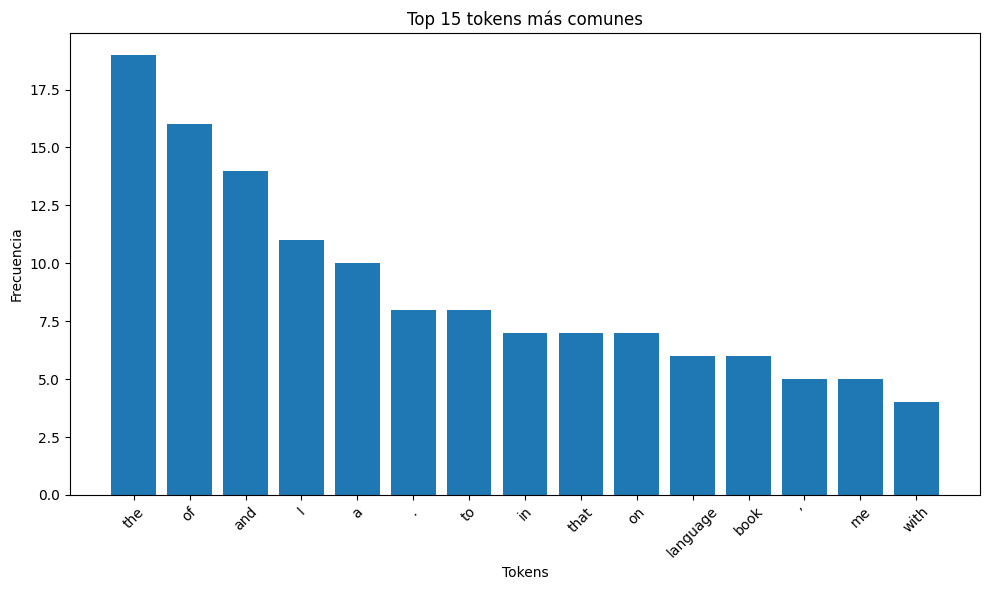

In [124]:
#Se seleccionan los 15 tokens mas comunes ordenan los tokens por frecuencia en orden descendente y seleccionar los 15 más comunes
top_15_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)[:15]

#Se crean listas para los tokens y las frecuencias para evitar problemas al graficar
top_tokens = []
top_frequencies = []

for token in top_15_tokens:
    top_tokens.append(token[0])  # Añade el token a la lista
    top_frequencies.append(token[1])  # Añade la frecuencia a la lista

# Se grafican las listas, frecuencia de los tokens en el eje "y" y los tokens en el eje "x"
plt.figure(figsize=(10, 6))
plt.bar(top_tokens, top_frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Top 15 tokens más comunes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Nomalización de texto

3. A. Convertir texto a minusculas: Esta operación la realizamos primero para garantizar la consistencia en todo el texto. Al convertir todo el texto a minúsculas, se facilita la identificación y comparación de palabras en los siguientes pasos, como la eliminación de stopwords y la lematización y el stemming.

In [125]:
#Utilizamos la funcion .lower() para convertir el texto en minusculas
Texto_minusculas=Texto.lower() 
print(Texto_minusculas)

my own journey toward language was sparked in 1996 when i discovered keith basso’s astonishing book wisdom sits in places. writing about the unique place-making language of the western apache basso described language in a way that i’d never considered before as roots and fragments strung together to sing of the land. this idea intrigued me so much that i began carrying donald borror’s classic little book the dictionary of word roots and combining forms with me on all my hikes (a practice which i’ve continued on a daily basis for nearly twenty years and on thousands of miles of trails) in order to learn the meaning and origin of word elements at the moment they occurred to me while walking in wild landscapes.

for many years this seemed little more than a quirky hobby with no real intent or direction but then a friend introduced me to calvert watkins’s magisterial survey of indo-european poetics how to kill a dragon. in a flash i realized that there might be untapped ways for the englis

3. B. Remover caracteres especiales: Realizamos esto antes de la tokenización para evitar que caracteres como signos de puntuación o símbolos se consideren parte de las palabras o que se generen tokens innecesarios.

In [126]:
#Utilizamos re.sub para sustituir todo el texto que no sean caracteres ni numeros, por un "vacio"
Texto_sin_caracteres=re.sub(r'[^a-zA-Z0-9\s]', '', Texto_minusculas)
print(Texto_sin_caracteres)

my own journey toward language was sparked in 1996 when i discovered keith bassos astonishing book wisdom sits in places writing about the unique placemaking language of the western apache basso described language in a way that id never considered before as roots and fragments strung together to sing of the land this idea intrigued me so much that i began carrying donald borrors classic little book the dictionary of word roots and combining forms with me on all my hikes a practice which ive continued on a daily basis for nearly twenty years and on thousands of miles of trails in order to learn the meaning and origin of word elements at the moment they occurred to me while walking in wild landscapes

for many years this seemed little more than a quirky hobby with no real intent or direction but then a friend introduced me to calvert watkinss magisterial survey of indoeuropean poetics how to kill a dragon in a flash i realized that there might be untapped ways for the english language to

3. C. Quitar espacios innecesarios: Lo utilizamos principalmente para evitar errrores en la tokenización ya que los espacios extra pueden llevar a tokens incorrectos o a inconsistencias en la identificación de stopwords o al realizar la lematización y el stemming.

In [127]:
#Se crea una lista de palabras separandolas usando .split()
#Luego se unen con un join separados por un espacio
Texto_sin_espacios = " ".join(Texto_sin_caracteres.split())
print(Texto_sin_espacios)

my own journey toward language was sparked in 1996 when i discovered keith bassos astonishing book wisdom sits in places writing about the unique placemaking language of the western apache basso described language in a way that id never considered before as roots and fragments strung together to sing of the land this idea intrigued me so much that i began carrying donald borrors classic little book the dictionary of word roots and combining forms with me on all my hikes a practice which ive continued on a daily basis for nearly twenty years and on thousands of miles of trails in order to learn the meaning and origin of word elements at the moment they occurred to me while walking in wild landscapes for many years this seemed little more than a quirky hobby with no real intent or direction but then a friend introduced me to calvert watkinss magisterial survey of indoeuropean poetics how to kill a dragon in a flash i realized that there might be untapped ways for the english language to 

3. D. Tokenizacion de texto: Debemos de tokenizar el documento para poder realizar la eliminación de stopwords, la lematización y el stemming ya que estas operaciones se realizan a nivel de token.

In [128]:
#Se tokenizan los tokens normalizados
tokens_normalizados = word_tokenize(Texto_sin_caracteres)

3. E. Stopwords: La eliminación de stopwords la realizamos antes del stemming y la lematización para poder reducir el ruido del documento y se puedan concentrar en las palabras significativas.

In [129]:
# Se inicializa el conjunto de stopwords en inglés.
stop_words = set(stopwords.words('english'))

# Se crea una lista para almacenar los tokens sin stopwords.
texto_sin_stopword = []

# Se almacenan los tokens que no son stopwords.
for w in tokens_normalizados:
    if w not in stop_words:
        texto_sin_stopword.append(w)

print(texto_sin_stopword)

['journey', 'toward', 'language', 'sparked', '1996', 'discovered', 'keith', 'bassos', 'astonishing', 'book', 'wisdom', 'sits', 'places', 'writing', 'unique', 'placemaking', 'language', 'western', 'apache', 'basso', 'described', 'language', 'way', 'id', 'never', 'considered', 'roots', 'fragments', 'strung', 'together', 'sing', 'land', 'idea', 'intrigued', 'much', 'began', 'carrying', 'donald', 'borrors', 'classic', 'little', 'book', 'dictionary', 'word', 'roots', 'combining', 'forms', 'hikes', 'practice', 'ive', 'continued', 'daily', 'basis', 'nearly', 'twenty', 'years', 'thousands', 'miles', 'trails', 'order', 'learn', 'meaning', 'origin', 'word', 'elements', 'moment', 'occurred', 'walking', 'wild', 'landscapes', 'many', 'years', 'seemed', 'little', 'quirky', 'hobby', 'real', 'intent', 'direction', 'friend', 'introduced', 'calvert', 'watkinss', 'magisterial', 'survey', 'indoeuropean', 'poetics', 'kill', 'dragon', 'flash', 'realized', 'might', 'untapped', 'ways', 'english', 'language', 

3. F. Stemming: Utilizamos esta normalización para reducir las palabras a su raíz o forma base. Esto ayuda a la lematización a centrarse en la raíz de la palabra más que en sus variaciones morfológicas.

In [130]:
# Se nicializa la funcion para realizar stemming.
ps = PorterStemmer()

# Se crea una lista para almacenar los tokens con stemming.
stemming_list=[]

# Se almacenan los tokens con stemming aplicado.
for words in texto_sin_stopword:
    stemming_list.append(ps.stem(words))
    
print(stemming_list)

['journey', 'toward', 'languag', 'spark', '1996', 'discov', 'keith', 'basso', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'uniqu', 'placemak', 'languag', 'western', 'apach', 'basso', 'describ', 'languag', 'way', 'id', 'never', 'consid', 'root', 'fragment', 'strung', 'togeth', 'sing', 'land', 'idea', 'intrigu', 'much', 'began', 'carri', 'donald', 'borror', 'classic', 'littl', 'book', 'dictionari', 'word', 'root', 'combin', 'form', 'hike', 'practic', 'ive', 'continu', 'daili', 'basi', 'nearli', 'twenti', 'year', 'thousand', 'mile', 'trail', 'order', 'learn', 'mean', 'origin', 'word', 'element', 'moment', 'occur', 'walk', 'wild', 'landscap', 'mani', 'year', 'seem', 'littl', 'quirki', 'hobbi', 'real', 'intent', 'direct', 'friend', 'introduc', 'calvert', 'watkinss', 'magisteri', 'survey', 'indoeuropean', 'poetic', 'kill', 'dragon', 'flash', 'realiz', 'might', 'untap', 'way', 'english', 'languag', 'speak', 'magic', 'land', 'depth', 'human', 'spirit', 'began', 'fouryear', 'quest', 

3. G. Lematizacion: Utilizamos la lematización para refinar los resultados del stemming ya que puede corregir las irregularidades que resultan del proceso de stemming, que a veces reduce palabras a raíces no estándar.

In [131]:
# Se inicializa la funcion para realizar lematizacion.
lemmatizer = WordNetLemmatizer()

# Se crea una lista para almacenar los tokens con lematización.
lemmatized_tokens = []

# Se almacenan los tokens con lematización aplicada.
for token in stemming_list:
  lemma = lemmatizer.lemmatize(token)
  lemmatized_tokens.append(lemma)
  
print(lemmatized_tokens)

['journey', 'toward', 'languag', 'spark', '1996', 'discov', 'keith', 'basso', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'uniqu', 'placemak', 'languag', 'western', 'apach', 'basso', 'describ', 'languag', 'way', 'id', 'never', 'consid', 'root', 'fragment', 'strung', 'togeth', 'sing', 'land', 'idea', 'intrigu', 'much', 'began', 'carri', 'donald', 'borror', 'classic', 'littl', 'book', 'dictionari', 'word', 'root', 'combin', 'form', 'hike', 'practic', 'ive', 'continu', 'daili', 'basi', 'nearli', 'twenti', 'year', 'thousand', 'mile', 'trail', 'order', 'learn', 'mean', 'origin', 'word', 'element', 'moment', 'occur', 'walk', 'wild', 'landscap', 'mani', 'year', 'seem', 'littl', 'quirki', 'hobbi', 'real', 'intent', 'direct', 'friend', 'introduc', 'calvert', 'watkinss', 'magisteri', 'survey', 'indoeuropean', 'poetic', 'kill', 'dragon', 'flash', 'realiz', 'might', 'untap', 'way', 'english', 'languag', 'speak', 'magic', 'land', 'depth', 'human', 'spirit', 'began', 'fouryear', 'quest', 

4.Exploracion de texto posterior a normalizacion.

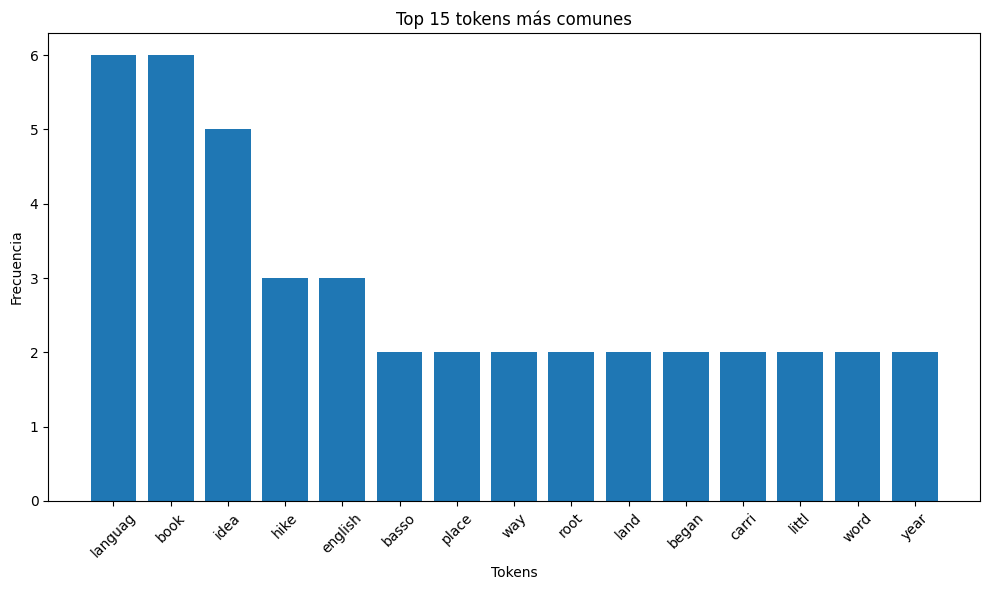

In [132]:
#Creamos un diccionario donde se almacena cada token con su respectiva frecuencia
token_frequencies_normalized = {}
for token in lemmatized_tokens:
    if token in token_frequencies_normalized:
        token_frequencies_normalized[token] += 1
    else:
        token_frequencies_normalized[token] = 1
        
#Se seleccionan los 15 tokens mas comunes ordenan los tokens por frecuencia en orden descendente y seleccionar los 15 más comunes
top_15_tokens_normalized = sorted(token_frequencies_normalized.items(), key=lambda x: x[1], reverse=True)[:15]

#Se crean listas para los tokens y las frecuencias para evitar problemas al graficar
top_tokens_normalized = []
top_frequencies_normalized = []

for token in top_15_tokens_normalized:
    top_tokens_normalized.append(token[0])  # Añade el token a la lista
    top_frequencies_normalized.append(token[1])  # Añade la frecuencia a la lista

# Se grafican las listas, frecuencia de los tokens en el eje "y" y los tokens en el eje "x"
plt.figure(figsize=(10, 6))
plt.bar(top_tokens_normalized, top_frequencies_normalized)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Top 15 tokens más comunes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Analisis y conclusiones

Después de la normalización, se pudo observar un cambio en las frecuencias de tokens más comunes, ya que en la primera grafica podemos observar que el podio se compone basicamente de stopwords, palabras que no tienen una importancia significativa. Yo creo que la normalización probablemente mejoró la calidad del análisis al permitir que la tokenización se enfoque en las palabras mas importantes del texto. La conversión a minúsculas y la eliminacion de espacios repetidos ayudaron a garantizar la consistencia en todo el texto para mejorar la identifacion de tokens. La eliminación de caracteres especiales y la eliminación de stopwords eliminó una gran cantidad de ruido al documento, enfocándose en las palabras mas relevantes del texto. Y por ultimo las técnicas de stemming y lematización facilitaron la relacion entre familias de palabras, lo que permitió una mejor comparación y análisis de sus respectivas frecuencias; aunque considero que hubiera sido preferible realizar unicamente la lematización para poder evitar errores al recortar palabraz con la agresividad del stemming.

PROCESAMIENTO TEXTO EN ESPAÑOL

1. Investigación

1. Se utilizan varias librerías de la libreria "nltk" de Python para el procesamiento del lenguaje natural, asi mismo usamos "re" para normalizar el texto quitando caracteres especiales usando expresiones regulares. De manera especifica se utilizó nltk.tokenize para la tokenización del cuerpo, matplotlib.pyplot para las graficas, nltk.stem para el stemming y utilizamos spacy para la lematización. Elegí utilizar mayormente la libreria nltk ya que es una de las librerías más populares, con bastante soporte, y con herramientas enfocadas principalmente al texto en ingles pero flexibles con el español, como la tokenización, el stemming, las stopwords,etc; además de tener una sintaxis e implementación muy sencilla. Y asi mismo seleccioné spacy porque contiene una base de datos bastante extensa para la lematización en español ademas de ser muy sencilla de aplicar.

In [133]:
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy


2. Analisis exploratorio del texto

2. A. Obtenemos el documento y realizamos la tokenización.

In [134]:
# Obtenemos el texto previamente almacenado en un archivo txt 
with open('Documento_Spanish.txt', 'r', encoding='utf-8') as archivo:
    Texto=archivo.read()

# Tokenización
tokens = word_tokenize(Texto)

2. B. Obtenemos los tokens unicos y la frecuencia de cada uno de ellos.

In [135]:
#Creamos un diccionario donde se almacena cada token con su respectiva frecuencia
token_frequencies = {}
for token in tokens:
    if token in token_frequencies:
        token_frequencies[token] += 1
    else:
        token_frequencies[token] = 1

2. C. Creamos el histograma de los 15 tokens mas comunes del documento y se muestra la grafica.

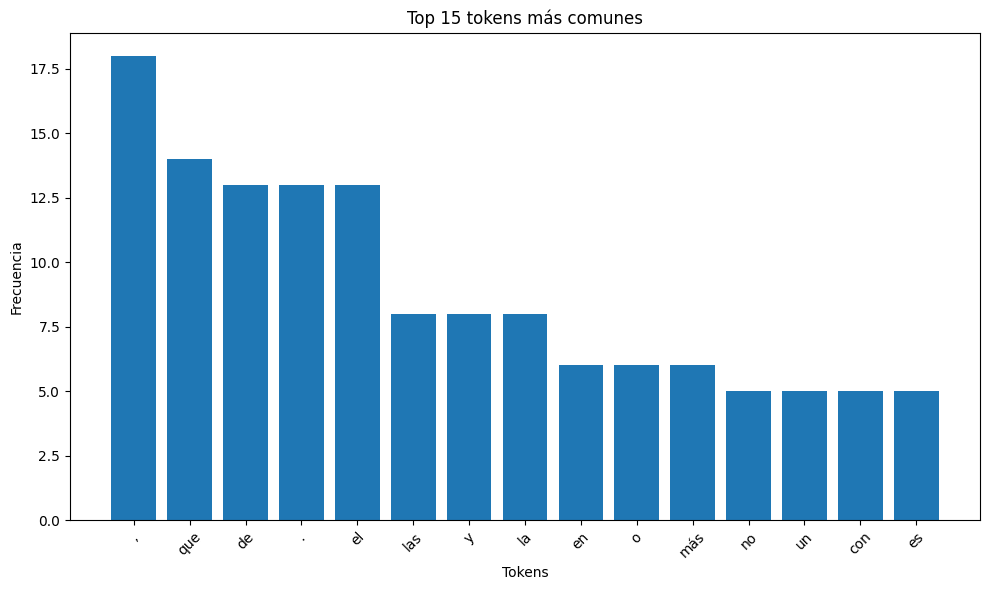

In [136]:
#Se seleccionan los 15 tokens mas comunes ordenan los tokens por frecuencia en orden descendente y seleccionar los 15 más comunes
top_15_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)[:15]

#Se crean listas para los tokens y las frecuencias para evitar problemas al graficar
top_tokens = []
top_frequencies = []

for token in top_15_tokens:
    top_tokens.append(token[0])  # Añade el token a la lista
    top_frequencies.append(token[1])  # Añade la frecuencia a la lista

# Se grafican las listas, frecuencia de los tokens en el eje "y" y los tokens en el eje "x"
plt.figure(figsize=(10, 6))
plt.bar(top_tokens, top_frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Top 15 tokens más comunes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Nomalización de texto

3. A. Convertir texto a minusculas: Esta operación la realizamos primero para garantizar la consistencia en todo el texto. Al convertir todo el texto a minúsculas, se facilita la identificación y comparación de palabras en los siguientes pasos, como la eliminación de stopwords y la lematización y el stemming.

In [137]:
#Utilizamos la funcion .lower() para convertir el texto en minusculas
Texto_minusculas=Texto.lower() 
print(Texto_minusculas)

por lo general no pensamos en las complejidades de nuestros propios lenguajes. es un comportamiento intuitivo que se utiliza para transmitir información y significados con señales semánticas como palabras, signos o imágenes. se dice que es más fácil aprender un idioma nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado casi como caminar. asimismo, el idioma no sigue un conjunto de reglas estricto ya que las excepciones son innumerables, por ejemplo: los sustantivos que terminan con ‘a’ son femeninos, pero no es el caso del sustantivo ‘el problema‘. sin embargo, a los humanos nos resulta natural, es extremadamente difícil para las computadoras ya que tienen que lidiar con una gran cantidad de datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención real. es por eso que el aprendizaje automático y la inteligencia artificial (ia) ganan fuerza y llaman la atención, puesto que los humanos dependen cada vez más de

3. B. Remover caracteres especiales: Realizamos esto antes de la tokenización para evitar que caracteres como signos de puntuación o símbolos se consideren parte de las palabras o que se generen tokens innecesarios.

In [138]:
#Utilizamos re.sub para sustituir todo el texto que no sean caracteres ni numeros, por un "vacio"
Texto_sin_caracteres=re.sub(r'[^a-zA-Z0-9\s]', '', Texto_minusculas)
print(Texto_sin_caracteres)

por lo general no pensamos en las complejidades de nuestros propios lenguajes es un comportamiento intuitivo que se utiliza para transmitir informacin y significados con seales semnticas como palabras signos o imgenes se dice que es ms fcil aprender un idioma nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado casi como caminar asimismo el idioma no sigue un conjunto de reglas estricto ya que las excepciones son innumerables por ejemplo los sustantivos que terminan con a son femeninos pero no es el caso del sustantivo el problema sin embargo a los humanos nos resulta natural es extremadamente difcil para las computadoras ya que tienen que lidiar con una gran cantidad de datos no estructurados la ausencia de reglas formales y la falta de un contexto o una intencin real es por eso que el aprendizaje automtico y la inteligencia artificial ia ganan fuerza y llaman la atencin puesto que los humanos dependen cada vez ms de los sistemas informticos para 

3. C. Quitar espacios innecesarios: Lo utilizamos principalmente para evitar errrores en la tokenización ya que los espacios extra pueden llevar a tokens incorrectos o a inconsistencias en la identificación de stopwords o al realizar la lematización y el stemming.

In [139]:
#Se crea una lista de palabras separandolas usando .split()
#Luego se unen con un join separados por un espacio
Texto_sin_espacios = " ".join(Texto_sin_caracteres.split())
print(Texto_sin_espacios)

por lo general no pensamos en las complejidades de nuestros propios lenguajes es un comportamiento intuitivo que se utiliza para transmitir informacin y significados con seales semnticas como palabras signos o imgenes se dice que es ms fcil aprender un idioma nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado casi como caminar asimismo el idioma no sigue un conjunto de reglas estricto ya que las excepciones son innumerables por ejemplo los sustantivos que terminan con a son femeninos pero no es el caso del sustantivo el problema sin embargo a los humanos nos resulta natural es extremadamente difcil para las computadoras ya que tienen que lidiar con una gran cantidad de datos no estructurados la ausencia de reglas formales y la falta de un contexto o una intencin real es por eso que el aprendizaje automtico y la inteligencia artificial ia ganan fuerza y llaman la atencin puesto que los humanos dependen cada vez ms de los sistemas informticos para 

3. D. Tokenizacion de texto: Debemos de tokenizar el documento para poder realizar la eliminación de stopwords, la lematización y el stemming ya que estas operaciones se realizan a nivel de token.

In [140]:
#Se tokenizan los tokens normalizados
tokens_normalizados = word_tokenize(Texto_sin_caracteres)

3. E. Stopwords: La eliminación de stopwords la realizamos antes del stemming y la lematización para poder reducir el ruido del documento y se puedan concentrar en las palabras significativas.

In [141]:
# Se inicializa el conjunto de stopwords en inglés.
stop_words = set(stopwords.words('spanish'))

# Se crea una lista para almacenar los tokens sin stopwords.
texto_sin_stopword = []

# Se almacenan los tokens que no son stopwords.
for w in tokens_normalizados:
    if w not in stop_words:
        texto_sin_stopword.append(w)

print(texto_sin_stopword)

['general', 'pensamos', 'complejidades', 'propios', 'lenguajes', 'comportamiento', 'intuitivo', 'utiliza', 'transmitir', 'informacin', 'significados', 'seales', 'semnticas', 'palabras', 'signos', 'imgenes', 'dice', 'ms', 'fcil', 'aprender', 'idioma', 'nuevo', 'adolescentes', 'trata', 'comportamiento', 'repetible', 'entrenado', 'casi', 'caminar', 'asimismo', 'idioma', 'sigue', 'conjunto', 'reglas', 'estricto', 'excepciones', 'innumerables', 'ejemplo', 'sustantivos', 'terminan', 'femeninos', 'caso', 'sustantivo', 'problema', 'embargo', 'humanos', 'resulta', 'natural', 'extremadamente', 'difcil', 'computadoras', 'lidiar', 'gran', 'cantidad', 'datos', 'estructurados', 'ausencia', 'reglas', 'formales', 'falta', 'contexto', 'intencin', 'real', 'aprendizaje', 'automtico', 'inteligencia', 'artificial', 'ia', 'ganan', 'fuerza', 'llaman', 'atencin', 'puesto', 'humanos', 'dependen', 'cada', 'vez', 'ms', 'sistemas', 'informticos', 'comunicarse', 'realizar', 'tareas', 'medida', 'ia', 'vuelve', 'ms'

3. F. Stemming: Utilizamos esta normalización para reducir las palabras a su raíz o forma base. Esto ayuda a la lematización a centrarse en la raíz de la palabra más que en sus variaciones morfológicas.

In [142]:
# Se nicializa la funcion para realizar stemming.
ps = PorterStemmer()

# Se crea una lista para almacenar los tokens con stemming.
stemming_list=[]

# Se almacenan los tokens con stemming aplicado.
for words in texto_sin_stopword:
    stemming_list.append(ps.stem(words))
    
print(stemming_list)

['gener', 'pensamo', 'complejidad', 'propio', 'lenguaj', 'comportamiento', 'intuitivo', 'utiliza', 'transmitir', 'informacin', 'significado', 'seal', 'semntica', 'palabra', 'signo', 'imgen', 'dice', 'ms', 'fcil', 'aprend', 'idioma', 'nuevo', 'adolescent', 'trata', 'comportamiento', 'repet', 'entrenado', 'casi', 'caminar', 'asimismo', 'idioma', 'sigu', 'conjunto', 'regla', 'estricto', 'excepcion', 'innumer', 'ejemplo', 'sustantivo', 'terminan', 'femenino', 'caso', 'sustantivo', 'problema', 'embargo', 'humano', 'resulta', 'natur', 'extremadament', 'difcil', 'computadora', 'lidiar', 'gran', 'cantidad', 'dato', 'estructurado', 'ausencia', 'regla', 'formal', 'falta', 'contexto', 'intencin', 'real', 'aprendizaj', 'automtico', 'inteligencia', 'artifici', 'ia', 'ganan', 'fuerza', 'llaman', 'atencin', 'puesto', 'humano', 'dependen', 'cada', 'vez', 'ms', 'sistema', 'informtico', 'comunicars', 'realizar', 'tarea', 'medida', 'ia', 'vuelv', 'ms', 'sofisticada', 'tambin', 'hace', 'procesamiento', 'l

3. G. Lematizacion: Utilizamos la lematización para refinar los resultados del stemming ya que puede corregir las irregularidades que resultan del proceso de stemming, que a veces reduce palabras a raíces no estándar.

In [143]:
# Se inicializa la funcion para realizar lematizacion.
nlp = spacy.load('es_core_news_sm')

# Se crea una lista para almacenar los tokens con lematización.
lemmatized_tokens = []

# Se almacenan los tokens con lematización aplicada.
for token in stemming_list:
    processed_token = nlp(token)
    lema = processed_token[0].lemma_
    lemmatized_tokens.append(lema)
  
print(lemmatized_tokens)

['gener', 'pensamo', 'complejidad', 'propio', 'lenguaj', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'informacin', 'significado', 'seal', 'semnticar', 'palabra', 'signo', 'imgen', 'decir', 'ms', 'fcil', 'aprend', 'idiomir', 'nuevo', 'adolescent', 'tratar', 'comportamiento', 'repet', 'entrenado', 'casi', 'caminar', 'asimismo', 'idiomir', 'sigu', 'conjunto', 'regla', 'estricto', 'excepcion', 'innumer', 'ejemplo', 'sustantivo', 'terminar', 'femenino', 'caso', 'sustantivo', 'problema', 'embargo', 'humano', 'resultar', 'natur', 'extremadament', 'difcil', 'computadoro', 'lidiar', 'gran', 'cantidad', 'dato', 'estructurado', 'ausencia', 'regla', 'formal', 'falta', 'contexto', 'intencin', 'real', 'aprendizaj', 'automtico', 'inteligencia', 'artifici', 'ir', 'ganar', 'fuerza', 'llamar', 'atencin', 'poner', 'humano', 'depender', 'cada', 'vez', 'ms', 'sistema', 'informtico', 'comunicars', 'realizar', 'tarea', 'medir', 'ir', 'vuelv', 'ms', 'sofisticado', 'tambin', 'hacer', 'procesamient

4.Exploracion de texto posterior a normalizacion.

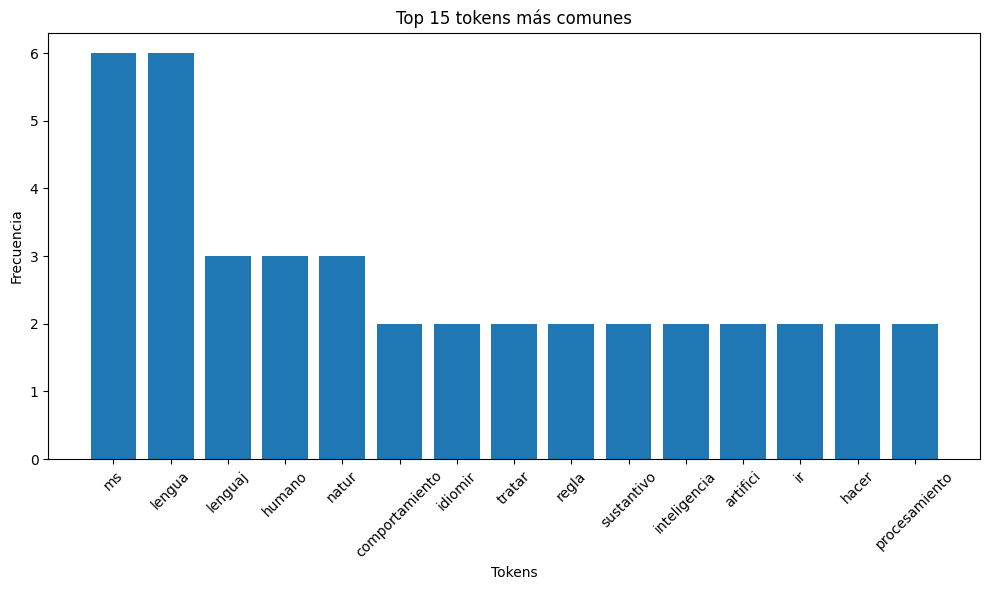

In [144]:
#Creamos un diccionario donde se almacena cada token con su respectiva frecuencia
token_frequencies_normalized = {}
for token in lemmatized_tokens:
    if token in token_frequencies_normalized:
        token_frequencies_normalized[token] += 1
    else:
        token_frequencies_normalized[token] = 1
        
#Se seleccionan los 15 tokens mas comunes ordenan los tokens por frecuencia en orden descendente y seleccionar los 15 más comunes
top_15_tokens_normalized = sorted(token_frequencies_normalized.items(), key=lambda x: x[1], reverse=True)[:15]

#Se crean listas para los tokens y las frecuencias para evitar problemas al graficar
top_tokens_normalized = []
top_frequencies_normalized = []

for token in top_15_tokens_normalized:
    top_tokens_normalized.append(token[0])  # Añade el token a la lista
    top_frequencies_normalized.append(token[1])  # Añade la frecuencia a la lista

# Se grafican las listas, frecuencia de los tokens en el eje "y" y los tokens en el eje "x"
plt.figure(figsize=(10, 6))
plt.bar(top_tokens_normalized, top_frequencies_normalized)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Top 15 tokens más comunes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Analisis y conclusiones

Después de la normalización, se pudo observar un cambio en las frecuencias de tokens más comunes, ya que en la primera grafica podemos observar que el podio se compone basicamente de stopwords, palabras que no tienen una importancia significativa. Yo creo que la normalización probablemente mejoró la calidad del análisis al permitir que la tokenización se enfoque en las palabras mas importantes del texto. La conversión a minúsculas y la eliminacion de espacios repetidos ayudaron a garantizar la consistencia en todo el texto para mejorar la identifacion de tokens. La eliminación de caracteres especiales y la eliminación de stopwords eliminó una gran cantidad de ruido al documento, enfocándose en las palabras mas relevantes del texto. Sin embargo considero que hubo un problema al aplizar la lematizacion y el stemming, ya que en los resultados se puede observar "lenguaj" y "lengua" que una vez analizando el texto nos precatamos que pertenecen a la misma familia de palabras hubiera sido preferible realizar unicamente la lematización para poder evitar errores al recortar palabras con la agresividad del stemming.